<a href="https://colab.research.google.com/github/maggiemcc02/Summer2023_Codes/blob/main/Winslow_Generator_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, I will play around with solving the Winslow Grid Generating problem with different boundary conditions.

In particular, consider the physical domain, $(x,y),$ and the logical domain, $(\xi, \eta).$ We want to solve a Mesh PDE on a uniform grid in $(\xi, \eta)$ to obtain the mappings $x = x(\xi, \eta)$ and $y = y(\xi, \eta)$ which give the coordinates of an adapted mesh (gives the mesh transformation).

However, in the Winslow formulation, we solve for the inverse transformation instead. In other words, we solve a PDE on (a typically uniform grid) $(x,y)$ to obtain the inverse transformation $\xi = \xi(x,y),$ $\eta = \eta(x,y).$ The PDE we solve for the Winslow generator is Laplace's Equation. In particular, we solve
$$ \nabla^2 \xi = \xi_{xx} + \xi_{yy} = 0$$
$$ \nabla^2 \eta = \eta_{xx} + \eta_{yy} = 0$$
on a convex domain with boundary conditions.

# Background

To learn more about the Winslow Generator for elliptic BVP's, I recommend taking a look at sections **1.1, 1.2, 1.3** (Introduction to Grid Generation) and **5.1, 5.2, 5.4.1, 5.4.2** (Winslow Generator) in

 [The Fundamentals of Grid Adaptation](https://www.researchgate.net/publication/265361548_The_Fundamentals_of_Grid_Generation)


# Install Firedrake and Imports

In [1]:
# install firedrake

# hide output
%%capture

try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

In [2]:
# Code in this cell makes plots appear an appropriate size and resolution in the browser window

%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (11, 6)

In [3]:
# import firedrake tools

from firedrake import *
import matplotlib.pyplot as plt # firedrake makes use of matplotlib tools
from firedrake.pyplot import tripcolor, tricontour, triplot #firedrake plotting

# Uniform Grid to Uniform Grid

We start by solving
$$ \nabla^2 \xi = \xi_{xx} + \xi_{yy} = 0 $$
$$ \nabla^2 \eta = \eta_{xx} + \eta_{yy} = 0 $$

on $\Omega = [0,1] \times [0,1]$.

We will set Dirichlet Boundary Conditions so that the solution values $(\xi(x,y), \eta(x,y))$ form a uniform grid.

In particular, we set

$$ \xi(0, y) = 0 $$
$$ \xi(1, y) = 1 $$
$$ \xi(x, 0) = x $$
$$ \xi(x, 1) = x $$

for the $\xi(x,y)$ problem, and

$$ \eta(0, y) = y $$
$$ \eta(1, y) = y $$
$$ \eta(x, 0) = 0 $$
$$ \eta(x, 1) = 1 $$

for the $\eta(x,y)$ problem.





## The Mesh and Function Space

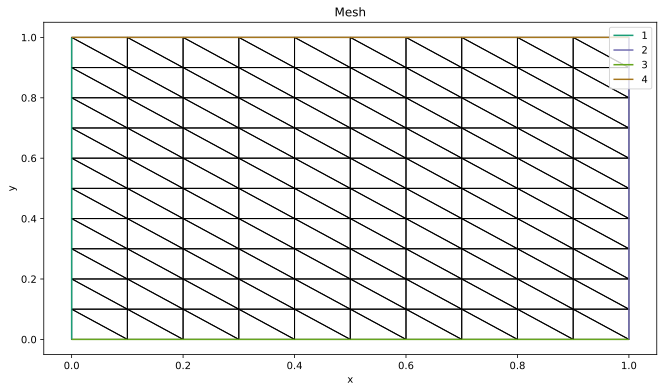

In [4]:
# define the mesh (x,y)

mesh = UnitSquareMesh(10, 10)

# define the function space

V = FunctionSpace(mesh, "CG", 1) # lagrange finite elements degree 1

# access the x and y coordinates

x,y = SpatialCoordinate(mesh)

# lets plot this mesh

fig, axes = plt.subplots()
triplot(mesh, axes=axes)
axes.set_title("Mesh")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend() # will indicate the labelling of the sides
plt.show()

## The $\xi$ Problem

Solve the $\xi$ problem

The weak form (based on Gockenbach Text) is
$$ \int_{\Omega} \nabla \xi \cdot \nabla v \,dx = 0 $$
with boundary conditions set to get a uniform $\xi$ on each boundary of $\Omega$

In [5]:
# define test and trial functions

xi = TrialFunction(V)

v = TestFunction(V)

In [6]:
# define the boundary conditions

bc1 = DirichletBC(V, Constant(0), 1)
bc2 = DirichletBC(V, Constant(1), 2)
bc3 = DirichletBC(V, x, 3)
bc4 = DirichletBC(V, x, 4)

bcs = [bc1, bc2, bc3, bc4]

In [7]:
# define the bilinear and linear forms

a = dot(grad(xi), grad(v))*dx

L = Constant(0)*v*dx

In [8]:
# solve the problem

xi_sol = Function(V) # to hold solution

solve(a==L, xi_sol, bcs)

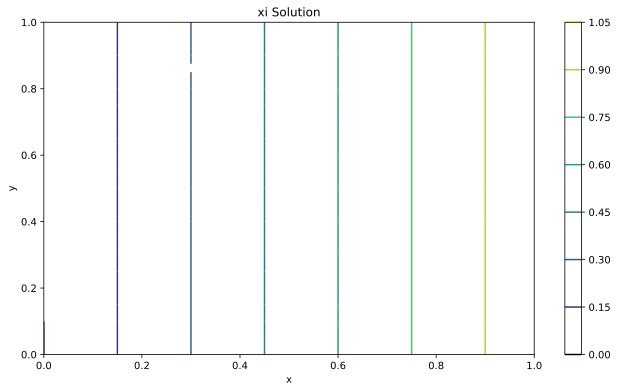

In [9]:
# plot the solution


# fill in gaps???
# contour plot??

fig, axes = plt.subplots()
xi_pic = tricontour(xi_sol, axes=axes)
fig.colorbar(xi_pic)
axes.set_title("xi Solution")
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.show()

## The $\eta$ Problem

Solve the $\eta$  problem

The weak form (based on Gockenbach Text) is (assuming test function vanishes on the boundary)
$$ \int_{\Omega} \nabla \eta \cdot \nabla v \,dx = 0 $$
with boundary conditions set to get a uniform $\eta$ on each boundary of $\Omega$

In [10]:
# define test and trial functions

eta = TrialFunction(V)

v = TestFunction(V) #use v in eta problem

In [11]:
# define the boundary conditions

bc1 = DirichletBC(V, y, 1)
bc2 = DirichletBC(V, y, 2)
bc3 = DirichletBC(V, Constant(0), 3)
bc4 = DirichletBC(V, Constant(1), 4)

bcs = [bc1, bc2, bc3, bc4]

In [12]:
# define the bilinear and linear

a = dot(grad(eta), grad(v))*dx

L = Constant(0)*v*dx

In [13]:
# solve the problem

eta_sol = Function(V) # to hold solution

solve(a==L, eta_sol, bcs)

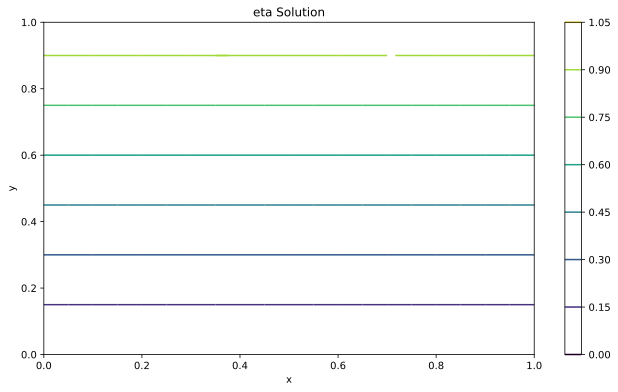

In [14]:
# plot the solution

fig, axes = plt.subplots()
eta_pic = tricontour(eta_sol, axes=axes)
fig.colorbar(eta_pic)
axes.set_title("eta Solution")
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.show()

## The Resulting Mesh

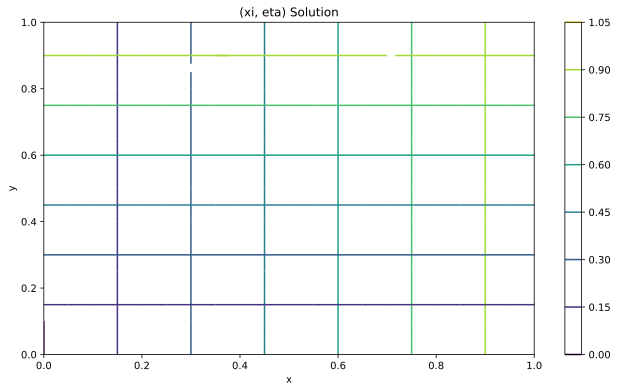

In [15]:
# Plotting xi and eta as functions of x and y

fig, axes = plt.subplots()
xi_sol_func = tricontour(xi_sol, axes=axes)
eta_func = tricontour(eta_sol, axes=axes)
fig.colorbar(eta_func)
axes.set_title("(xi, eta) Solution")
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.show()

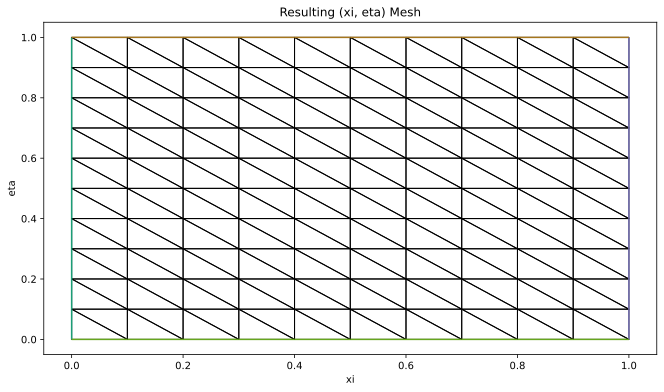

In [16]:
# Plot the function values to obtain the mesh!
# (plot the coordinates (xi, eta) rather then xi(x,y) and eta(x,y))

N = np.shape(xi_sol.dat.data)[0]
mesh_values = np.zeros([N,2])
mesh_values[:,0] = xi_sol.dat.data
mesh_values[:,1] = eta_sol.dat.data
mesh.coordinates.dat.data[:] = mesh_values
fig, axes = plt.subplots()
triplot(mesh, axes=axes)
axes.set_title("Resulting (xi, eta) Mesh")
axes.set_xlabel("xi")
axes.set_ylabel("eta")
plt.show()

# Uniform Grid to SaltBox House

We now alter the Dirichlet Boundary Conditions to try and create a Saltbox House looking grid.



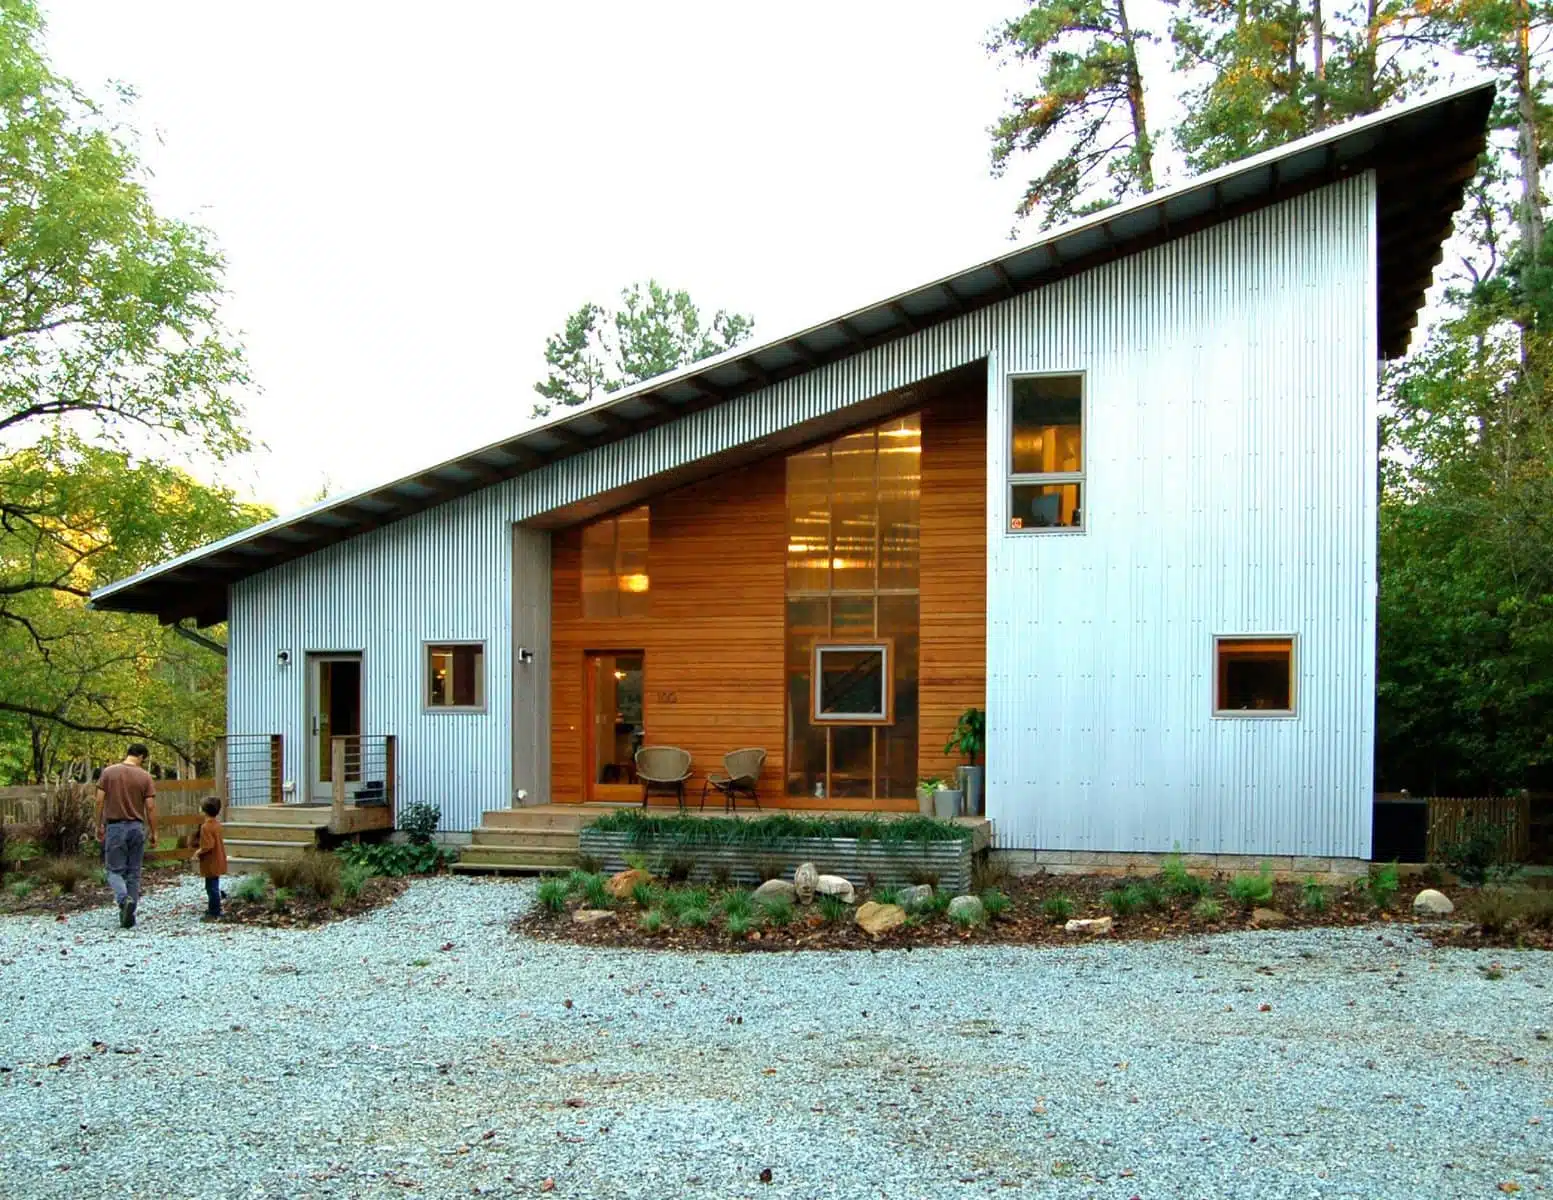

In particular, we will solve,

$$ \nabla^2 \xi = \xi_{xx} + \xi_{yy} = 0 $$
$$ \nabla^2 \eta = \eta_{xx} + \eta_{yy} = 0 $$

on $\Omega = [0,1] \times [0,1]$
with

$$ \xi(0, y) = 0 $$
$$ \xi(1, y) = 1 $$
$$ \xi(x, 0) = x $$
$$ \xi(x, 1) = x $$

for the $\xi(x,y)$ problem, and

$$ \eta(0, y) = y $$
$$ \eta(1, y) = 2y $$
$$ \eta(x, 0) = 0 $$
$$ \eta(x, 1) = x + 1 $$

for the $\eta(x,y)$ problem.






## The Mesh and Function Space

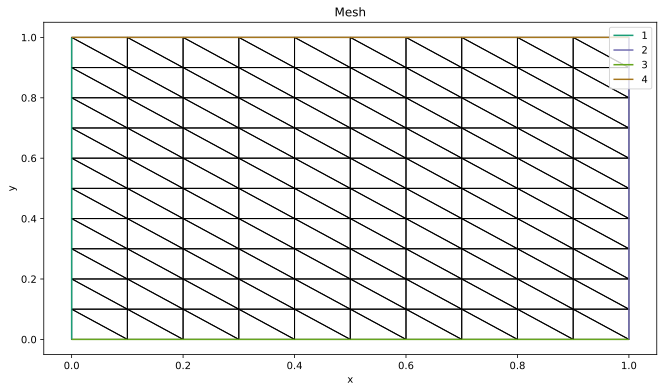

In [17]:
# define the mesh (x,y)

mesh = UnitSquareMesh(10, 10)

# define the function space

V = FunctionSpace(mesh, "CG", 1) # lagrange finite elements degree 1

# access the x and y coordinates

x,y = SpatialCoordinate(mesh)

# lets plot this mesh

fig, axes = plt.subplots()
triplot(mesh, axes=axes)
axes.set_title("Mesh")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend() # will indicate the labelling of the sides
plt.show()

## The $\xi$ Problem

In [18]:
# define test and trial functions

xi = TrialFunction(V)

v = TestFunction(V)

In [19]:
# define the boundary conditions

bc1 = DirichletBC(V, Constant(0), 1)
bc2 = DirichletBC(V, Constant(1), 2)
bc3 = DirichletBC(V, x, 3)
bc4 = DirichletBC(V, x, 4)

bcs = [bc1, bc2, bc3, bc4]

In [20]:
# define the bilinear and linear

a = dot(grad(xi), grad(v))*dx

L = Constant(0)*v*dx

In [21]:
# solve the problem

xi_sol = Function(V) # to hold solution

solve(a==L, xi_sol, bcs)

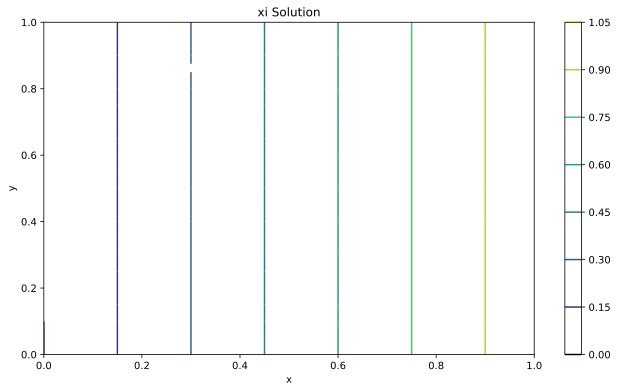

In [22]:
# plot the solution

fig, axes = plt.subplots()
xi_pic = tricontour(xi_sol, axes=axes)
fig.colorbar(xi_pic)
axes.set_title("xi Solution")
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.show()

## The $\eta$ Problem

In [23]:
# define test and trial functions

eta = TrialFunction(V)

v = TestFunction(V)

In [24]:
# define the boundary conditions

bc1 = DirichletBC(V, y, 1)
bc2 = DirichletBC(V, 2*y, 2)
bc3 = DirichletBC(V, Constant(0), 3)
bc4 = DirichletBC(V, x + 1, 4)

bcs = [bc1, bc2, bc3, bc4]

In [25]:
# define the bilinear and linear

a = dot(grad(eta), grad(v))*dx

L = Constant(0)*v*dx

In [26]:
# solve the problem

eta_sol = Function(V) # to hold solution

solve(a==L, eta_sol, bcs)

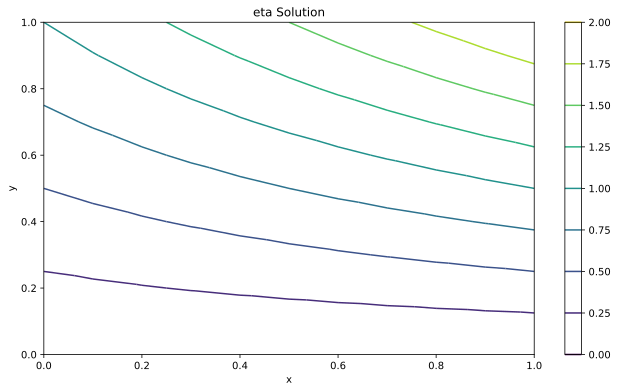

In [27]:
# plot the solution

fig, axes = plt.subplots()
eta_pic = tricontour(eta_sol, axes=axes)
fig.colorbar(eta_pic)
axes.set_title("eta Solution")
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.show()

## The Resulting Mesh

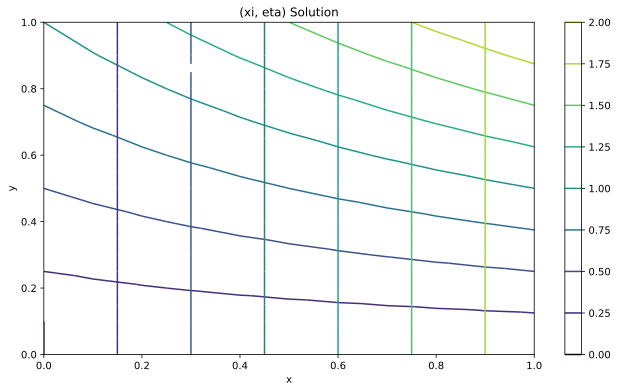

In [28]:
# plot the functions xi(x,y) and eta(x,y)

fig, axes = plt.subplots()
eta_func = tricontour(eta_sol, axes=axes)
xi_func = tricontour(xi_sol, axes=axes)
fig.colorbar(eta_func)
axes.set_title("(xi, eta) Solution")
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.show()

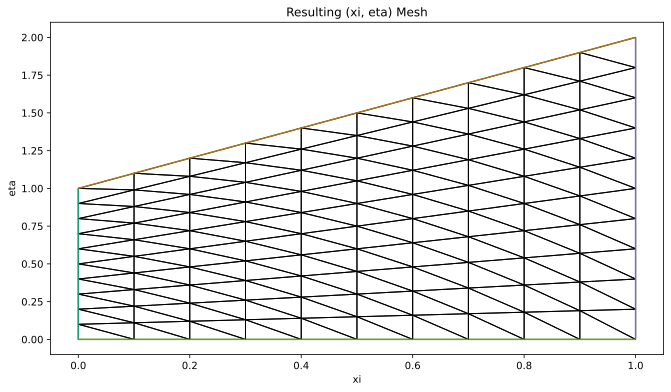

In [29]:
# Plot the function values/coordinates (xi,eta) to see the mesh

N = np.shape(xi_sol.dat.data)[0]
mesh_values = np.zeros([N,2])
mesh_values[:,0] = xi_sol.dat.data
mesh_values[:,1] = eta_sol.dat.data
mesh.coordinates.dat.data[:] = mesh_values
fig, axes = plt.subplots()
triplot(mesh, axes=axes)
axes.set_title("Resulting (xi, eta) Mesh")
axes.set_xlabel("xi")
axes.set_ylabel("eta")
plt.show()

# Extra Example

We now alter the Dirichlet Boundary Conditions to try and create a saltbox house with a rounded roof (parabolic top)

In particular, we will solve,

$$ \nabla^2 \xi = \xi_{xx} + \xi_{yy} = 0 $$
$$ \nabla^2 \eta = \eta_{xx} + \eta_{yy} = 0 $$

on $\Omega = [0,1] \times [0,1]$

with

$$ \xi(0, y) = 0 $$
$$ \xi(1, y) = 1 $$
$$ \xi(x, 0) = x $$
$$ \xi(x, 1) = x $$

for the $\xi(x,y)$ problem, and

$$ \eta(0, y) = y $$
$$ \eta(1, y) = 2y $$
$$ \eta(x, 0) = 0 $$
$$ \eta(x, 1) = x^2 + 1 $$

for the $\eta(x,y)$ problem.






## The Mesh and Function Space

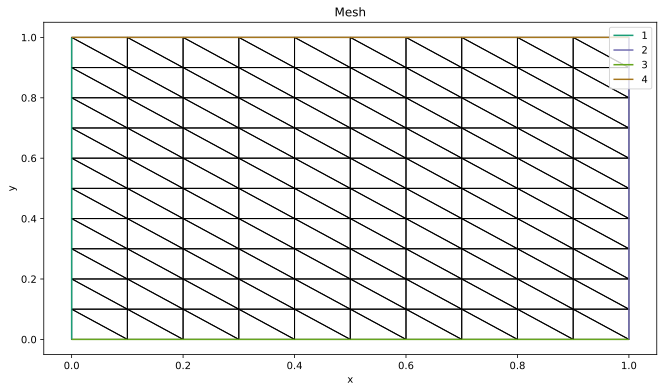

In [30]:
# define the mesh (x,y)

mesh = UnitSquareMesh(10, 10)

# define the function space

V = FunctionSpace(mesh, "CG", 1) # lagrange finite elements degree 1

# access the x and y coordinates

x,y = SpatialCoordinate(mesh)

# lets plot this mesh

fig, axes = plt.subplots()
triplot(mesh, axes=axes)
axes.set_title("Mesh")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend() # will indicate the labelling of the sides
plt.show()

## The $\xi$ Problem

In [31]:
# define test and trial functions

xi = TrialFunction(V)

v = TestFunction(V)

In [32]:
# define the boundary conditions

bc1 = DirichletBC(V, Constant(0), 1)
bc2 = DirichletBC(V, Constant(1), 2)
bc3 = DirichletBC(V, x, 3)
bc4 = DirichletBC(V, x, 4)

bcs = [bc1, bc2, bc3, bc4]

In [33]:
# define the bilinear and linear

a = dot(grad(xi), grad(v))*dx

L = Constant(0)*v*dx

In [34]:
# solve the problem

xi_sol = Function(V) # to hold solution

solve(a==L, xi_sol, bcs)

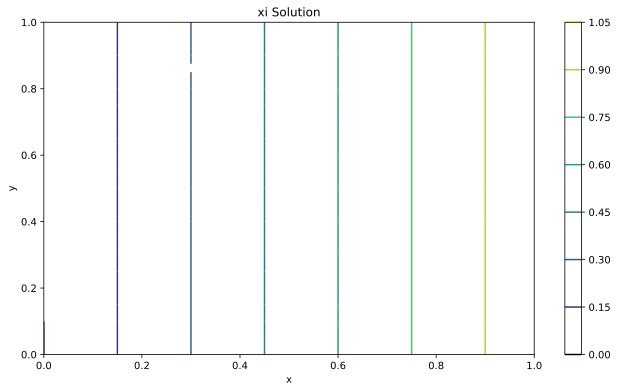

In [35]:
# plot the solution

fig, axes = plt.subplots()
xi_pic = tricontour(xi_sol, axes=axes)
fig.colorbar(xi_pic)
axes.set_title("xi Solution")
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.show()

## The $\eta$ Problem

In [36]:
# define test and trial functions

eta = TrialFunction(V)

v = TestFunction(V)

In [37]:
# define the boundary conditions

bc1 = DirichletBC(V, y, 1)
bc2 = DirichletBC(V, 2*y, 2)
bc3 = DirichletBC(V, Constant(0), 3)
bc4 = DirichletBC(V, x**2 + 1, 4)

bcs = [bc1, bc2, bc3, bc4]

In [38]:
# define the bilinear and linear

a = dot(grad(eta), grad(v))*dx

L = Constant(0)*v*dx

In [39]:
# solve the problem

eta_sol = Function(V) # to hold solution

solve(a==L, eta_sol, bcs)

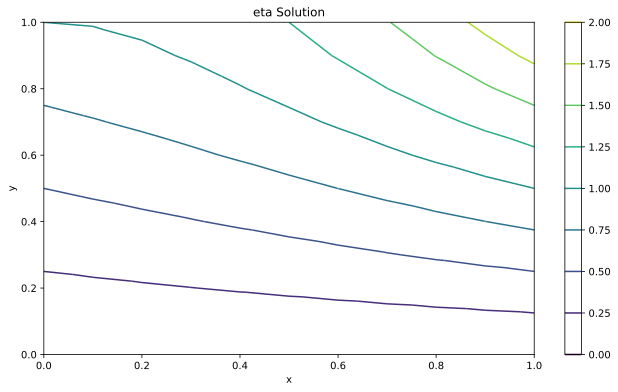

In [40]:
# plot the solution

fig, axes = plt.subplots()
eta_pic = tricontour(eta_sol, axes=axes)
fig.colorbar(eta_pic)
axes.set_title("eta Solution")
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.show()

## The Resulting Mesh

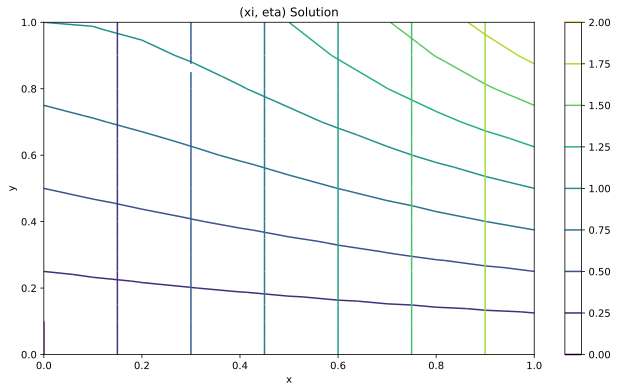

In [41]:
# plot the functions xi(x,y) and eta(x,y)

fig, axes = plt.subplots()
eta_func = tricontour(eta_sol, axes=axes)
xi_func = tricontour(xi_sol, axes=axes)
fig.colorbar(eta_func)
axes.set_title("(xi, eta) Solution")
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.show()

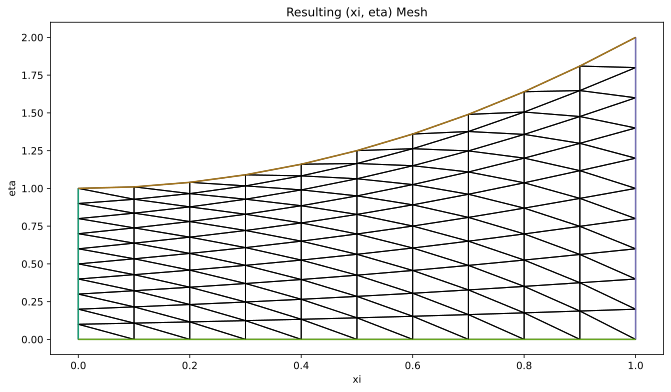

In [42]:
# Plot the function values/coordinates (xi,eta) to see the mesh

N = np.shape(xi_sol.dat.data)[0]
mesh_values = np.zeros([N,2])
mesh_values[:,0] = xi_sol.dat.data
mesh_values[:,1] = eta_sol.dat.data
mesh.coordinates.dat.data[:] = mesh_values
fig, axes = plt.subplots()
triplot(mesh, axes=axes)
axes.set_title("Resulting (xi, eta) Mesh")
axes.set_xlabel("xi")
axes.set_ylabel("eta")
plt.show()